In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, add_indicators, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

---

## For **prepare_data** function

In [3]:
data = prepare_data(SP500_TICKER)
data

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,-14.030029,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,-55.799927,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,2.689941,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1.339966,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,38.020020,1225200000
...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000


In [4]:
data.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Change    float64
Volume      int64
dtype: object

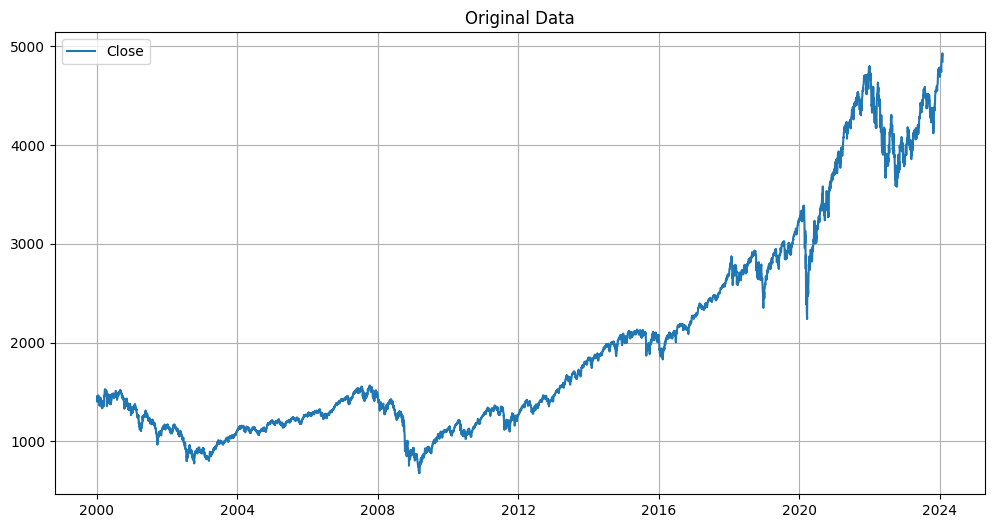

In [5]:
plt = config_chart('Original Data')
plt.plot(data['Close'])
plt.legend(['Close'])

In [6]:
# plt = config_chart('Original Data')
# plt.plot(data['Change'])
# plt.legend(['Change'])

---

## For **add_indicators** function

In [7]:
# extended_data = add_indicators(data)
# extended_data

In [8]:
# plt = config_chart('RSI Indicator')
# plt.plot(extended_data['RSI'])
# plt.legend(['RSI'])

In [9]:
# plt = config_chart('Simple Moving Average')
# plt.plot(extended_data['SMA'])
# plt.legend(['SMA'])

---

## For **normalize_data** function

In [10]:
normalized_data = normalize_data(data)
normalized_data

,Open,High,Low,Close,Change,Volume
Date,,,,,,
2000-01-03,0.186024,0.184788,0.181568,0.183161,0.454331,0.051867
2000-01-04,0.182720,0.179410,0.171936,0.170036,0.314986,0.058822
2000-01-05,0.169580,0.169507,0.167289,0.170668,0.510109,0.065713
2000-01-06,0.170213,0.169183,0.170682,0.170984,0.505605,0.066326
2000-01-07,0.170529,0.176164,0.172713,0.179927,0.627970,0.078299
...,...,...,...,...,...,...
2024-01-25,0.990762,0.992223,0.988956,0.992057,0.526155,0.330118
2024-01-26,0.991292,0.994240,0.991811,0.991306,0.508007,0.270026
2024-01-29,0.992243,0.999580,0.993206,1.000000,0.617828,0.285499


In [11]:
# plt = config_chart('Normalized Data')
# plt.plot(normalized_data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

----

## For **prepare_sequences** function

In [12]:
x, y, x_dates, y_dates = prepare_sequences(normalized_data)

In [13]:
x.shape, y.shape, x_dates.shape, y_dates.shape

((6041, 15, 6), (6041, 1, 1), (6041, 15), (6041, 1))

In [14]:
y

array([[[0.48131888]],

       [[0.48268716]],

       [[0.37303238]],

       ...,

       [[0.5080073 ]],

       [[0.61782823]],

       [[0.49806608]]])

In [15]:
y[0], y_dates[0]

(array([[0.48131888]]),
 array(['2000-01-26T00:00:00.000000000'], dtype='datetime64[ns]'))

In [16]:
x[0], x_dates[0]

(array([[0.18271985, 0.17941036, 0.17193635, 0.17003575, 0.31498627,
         0.05882167],
        [0.16957997, 0.16950674, 0.16728872, 0.17066847, 0.51010859,
         0.06571347],
        [0.1702134 , 0.16918331, 0.17068206, 0.17098365, 0.50560507,
         0.06632607],
        [0.17052894, 0.17616423, 0.1727129 , 0.17992659, 0.6279698 ,
         0.07829887],
        [0.17948197, 0.18156815, 0.18229995, 0.18372064, 0.55494467,
         0.06384863],
        [0.18328029, 0.18022249, 0.18064094, 0.17924213, 0.43761774,
         0.05927212],
        [0.17879674, 0.17643101, 0.17891365, 0.1777579 , 0.48008457,
         0.05572262],
        [0.17731083, 0.17916955, 0.18013028, 0.18185774, 0.55928164,
         0.06074957],
        [0.18141529, 0.1836079 , 0.18423197, 0.18549653, 0.55274279,
         0.0657495 ],
        [0.18505819, 0.18175466, 0.18461319, 0.18314201, 0.46774153,
         0.06311891],
        [0.18270102, 0.18086699, 0.18399665, 0.18332078, 0.50367034,
         0.06592067],

In [17]:
# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 1])
# plt.plot(x_dates[0], x[0, :, 2])
# plt.plot(y_dates[0], y[0, :, 1])
# plt.plot(y_dates[0], y[0, :, 2])
# plt.legend(['Direction X', 'Change X', 'Direction Y', 'Change Y'])


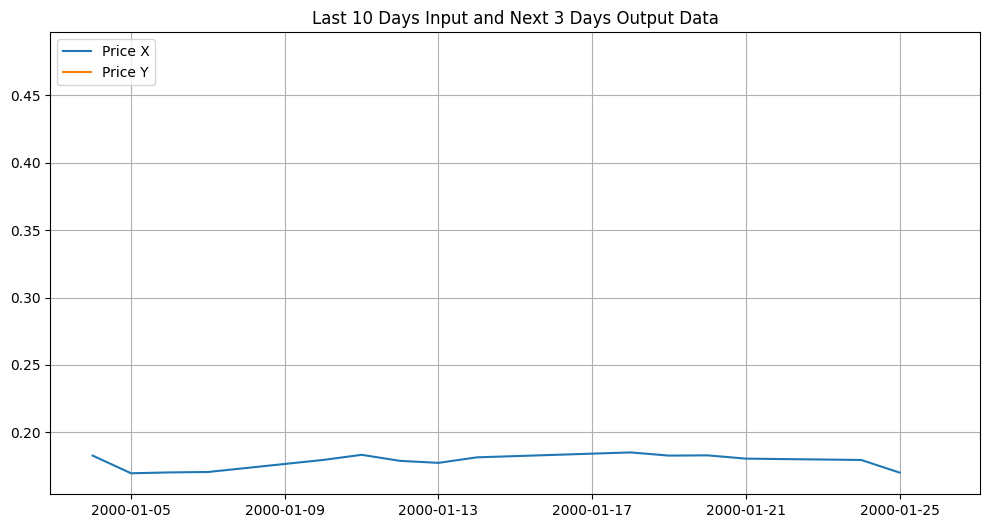

In [18]:
plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
plt.plot(x_dates[0], x[0, :, 0])
plt.plot(y_dates[0], y[0, :, 0])
plt.legend(['Price X', 'Price Y'])

---

## For **split_train_and_test_data** function

In [19]:
train, test, predict = split_train_and_test_data(x, y, x_dates, y_dates)

In [20]:
train['x'].shape,  train['x_dates'].shape, train['y'].shape,  train['y_dates'].shape

((4832, 15, 6), (4832, 15), (4832, 1, 1), (4832, 1))

In [21]:
test['x'].shape, test['x_dates'].shape, test['y'].shape, test['y_dates'].shape

((604, 15, 6), (604, 15), (604, 1, 1), (604, 1))

In [22]:
predict['x'].shape, predict['x_dates'].shape, predict['y'].shape, predict['y_dates'].shape

((605, 15, 6), (605, 15), (605, 1, 1), (605, 1))

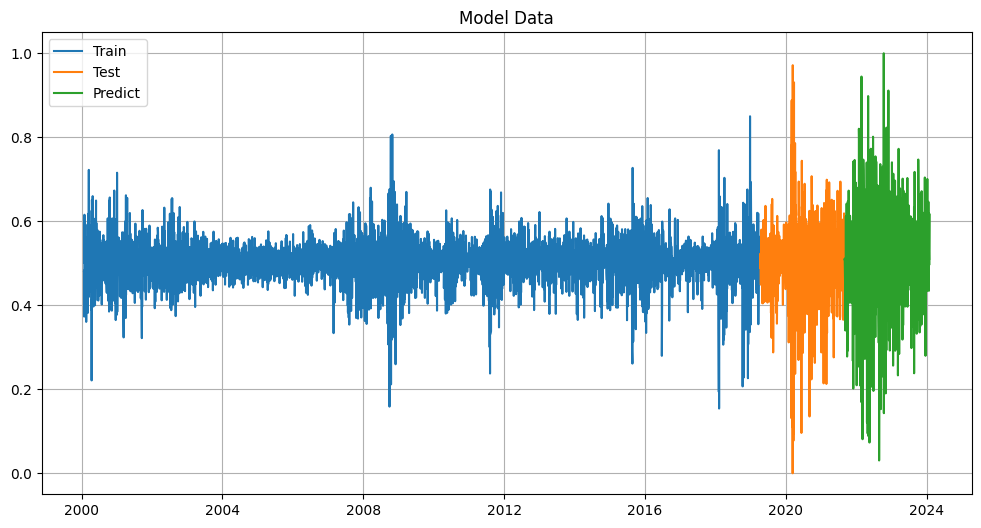

In [23]:
plt = config_chart('Model Data')
plt.plot(train['y_dates'][:, 0], train['y'][:, 0, 0])
plt.plot(test['y_dates'][:, 0], test['y'][:, 0, 0])
plt.plot(predict['y_dates'][:, 0], predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [24]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [25]:
# x_train.shape, y_train.shape

In [26]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [27]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [28]:
# x_test.shape, y_test.shape

In [29]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [30]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [31]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [32]:
print(train['x'].shape) 
print(train['x'][0])

print(train['x_dates'].shape) 
print(train['x_dates'][0])


(4832, 15, 6)
[[0.18271985 0.17941036 0.17193635 0.17003575 0.31498627 0.05882167]
 [0.16957997 0.16950674 0.16728872 0.17066847 0.51010859 0.06571347]
 [0.1702134  0.16918331 0.17068206 0.17098365 0.50560507 0.06632607]
 [0.17052894 0.17616423 0.1727129  0.17992659 0.6279698  0.07829887]
 [0.17948197 0.18156815 0.18229995 0.18372064 0.55494467 0.06384863]
 [0.18328029 0.18022249 0.18064094 0.17924213 0.43761774 0.05927212]
 [0.17879674 0.17643101 0.17891365 0.1777579  0.48008457 0.05572262]
 [0.17731083 0.17916955 0.18013028 0.18185774 0.55928164 0.06074957]
 [0.18141529 0.1836079  0.18423197 0.18549653 0.55274279 0.0657495 ]
 [0.18505819 0.18175466 0.18461319 0.18314201 0.46774153 0.06311891]
 [0.18270102 0.18086699 0.18399665 0.18332078 0.50367034 0.06592067]
 [0.18287999 0.18188685 0.18161047 0.18089097 0.46667378 0.06708282]
 [0.18044744 0.17892877 0.1818599  0.17990072 0.4870905  0.0769115 ]
 [0.17945607 0.17914358 0.17146335 0.17053205 0.36826213 0.06844316]
 [0.17007683 0.16974

In [33]:

print(train['y'].shape)
print(train['y'][0])

print(train['y_dates'].shape) 
print(train['y_dates'][0])

(4832, 1, 1)
[[0.48131888]]
(4832, 1)
['2000-01-26T00:00:00.000000000']


In [34]:
print(test['x'].shape) 
print(test['x'][0])

print(test['x_dates'].shape) 
print(test['x_dates'][0])

print(test['y'].shape)
print(test['y'][0])

print(test['y_dates'].shape) 
print(test['y_dates'][0])

(604, 15, 6)
[[0.50403496 0.51112657 0.50608307 0.5123841  0.61842848 0.29337865]
 [0.50987492 0.50778597 0.50210378 0.49964244 0.3549845  0.35113548]
 [0.49845169 0.49919971 0.49846805 0.49908971 0.50897487 0.27477442]
 [0.50237244 0.50394025 0.50293212 0.50381753 0.52048392 0.26418538]
 [0.50403496 0.50292272 0.49910341 0.50073858 0.4532638  0.27624196]
 [0.50160477 0.50154162 0.50170374 0.50310717 0.52128452 0.25489633]
 [0.50604834 0.50539449 0.50651844 0.50756687 0.52158424 0.30598208]
 [0.51084272 0.51327251 0.51343691 0.51527963 0.56305133 0.28864629]
 [0.51546055 0.5140988  0.51581841 0.51529141 0.49779894 0.26226108]
 [0.5173091  0.51701443 0.51732916 0.51674032 0.49216048 0.28953907]
 [0.51681457 0.51607719 0.51779274 0.51814927 0.51914903 0.2416785 ]
 [0.5192094  0.51890072 0.52152263 0.52128943 0.5297581  0.25223961]
 [0.52022198 0.5195405  0.52100258 0.52200214 0.52552131 0.24327487]
 [0.5197793  0.51739922 0.51924943 0.51786937 0.47317882 0.24111454]
 [0.51855245 0.518067

In [35]:
print(predict['x'].shape) 
print(predict['x'][0])

print(predict['x_dates'].shape) 
print(predict['x_dates'][0])

print(predict['y'].shape)
print(predict['y'][0])

print(predict['y_dates'].shape) 
print(predict['y_dates'][0])

(605, 15, 6)
[[0.8870134  0.88920213 0.88697204 0.89013029 0.55034097 0.27199968]
 [0.89143098 0.89076029 0.89282214 0.89181678 0.51167723 0.23967222]
 [0.89067981 0.89356722 0.88737214 0.89457115 0.56138333 0.27157897]
 [0.89079053 0.88928478 0.88270566 0.88713128 0.45429734 0.31358917]
 [0.88580299 0.88744327 0.87794267 0.87588556 0.36546    0.30625865]
 [0.87202729 0.8790128  0.87091596 0.87718626 0.57906349 0.36416953]
 [0.87864907 0.8850896  0.88010999 0.8856235  0.60491751 0.2969813 ]
 [0.88800476 0.89583835 0.89034424 0.89452877 0.59867879 0.29012735]
 [0.89603702 0.89653012 0.89787216 0.89610477 0.50724009 0.3264052 ]
 [0.89746176 0.89863122 0.89866763 0.89844752 0.52028275 0.27825094]
 [0.8982388  0.89725957 0.89474482 0.89228721 0.42190489 0.2619701 ]
 [0.8936116  0.90137452 0.89594729 0.90154772 0.6187958  0.26802587]
 [0.90295074 0.90704751 0.90528012 0.9061156  0.55127596 0.25338283]
 [0.90671615 0.90563817 0.90576018 0.90467846 0.47754999 0.35446696]
 [0.9064924  0.906988